## CNN: A technique to extract features from an image

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(np.__version__)

2.12.0
1.22.4


In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print(train_imgs.shape)
print(train_labels.shape)
print(test_imgs.shape)
print(test_labels.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
train_imgs, test_imgs = train_imgs/255.0, test_imgs/255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
history = model.fit(train_imgs, train_labels, epochs=20,validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 21s 4ms/step - loss: 0.4918 - accuracy: 0.8221 - val_loss: 0.3509 - val_accuracy: 0.8745
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3267 - accuracy: 0.8819 - val_loss: 0.3085 - val_accuracy: 0.8858
Epoch 3/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2825 - accuracy: 0.8960 - val_loss: 0.3119 - val_accuracy: 0.8843
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2521 - accuracy: 0.9072 - val_loss: 0.2716 - val_accuracy: 0.9007
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2303 - accuracy: 0.9145 - val_loss: 0.2743 - val_accuracy: 0.8990
Epoch 6/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9215 - val_loss: 0.2752 - val_accuracy: 0.8990
Epoch 7/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1949 - accuracy: 0.9272 - val_loss: 0.2569 - val_accuracy

[]

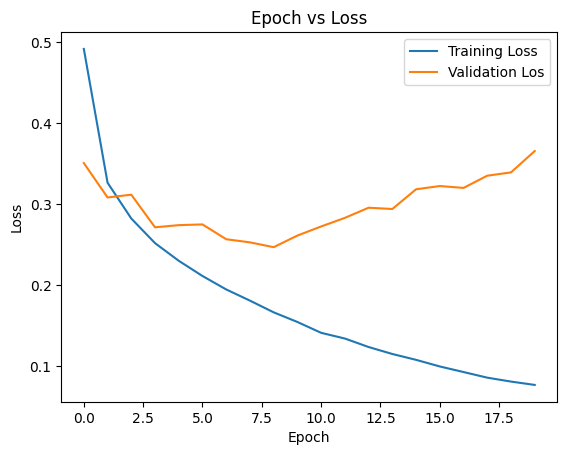

In [ ]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label = 'Validation Los')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.plot()

[]

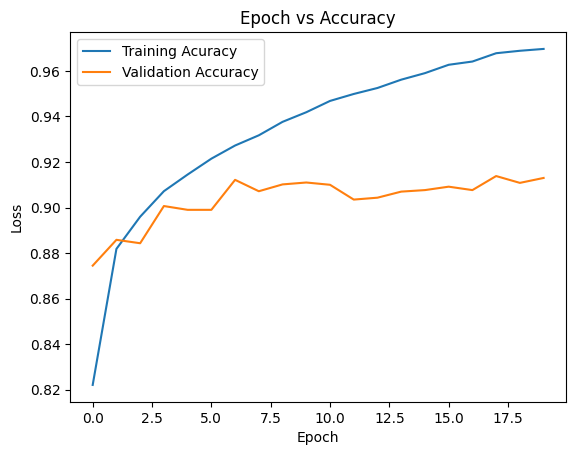

In [ ]:
plt.plot(history.history['accuracy'], label="Training Acuracy")
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.plot()

## Visualizing the Convolutions

In [ ]:
# print label and index
for v in enumerate(test_labels[:50]):
  print(v)

(0, 9)
(1, 2)
(2, 1)
(3, 1)
(4, 6)
(5, 1)
(6, 4)
(7, 6)
(8, 5)
(9, 7)
(10, 4)
(11, 5)
(12, 7)
(13, 3)
(14, 4)
(15, 1)
(16, 2)
(17, 4)
(18, 8)
(19, 0)
(20, 2)
(21, 5)
(22, 7)
(23, 9)
(24, 1)
(25, 4)
(26, 6)
(27, 0)
(28, 9)
(29, 3)
(30, 8)
(31, 8)
(32, 3)
(33, 3)
(34, 8)
(35, 0)
(36, 7)
(37, 5)
(38, 7)
(39, 9)
(40, 6)
(41, 1)
(42, 3)
(43, 7)
(44, 6)
(45, 7)
(46, 2)
(47, 1)
(48, 2)
(49, 2)


In [ ]:
model.layers

1/1 [==============================] - 0s 19ms/step


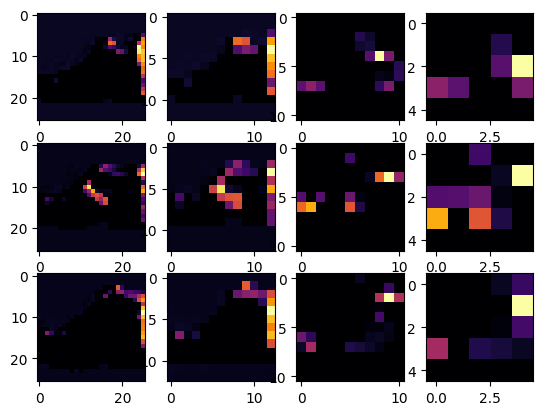

In [ ]:
f, ax = plt.subplots(3, 4)

FIRST_IMG = 0
SECOND_IMG = 23
THIRD_IMG = 28
CONVOLUTION_NUMBER = 1

layer_output = [ layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs= layer_output)

# We have 2 Convolution Layers and 2 Max Pooling Layers ==> Total Layer output = 4
for x in range(0, 4):
  f1 = activation_model.predict(test_imgs[FIRST_IMG].reshape(1, 28, 28, 1))[x]
  ax[0, x].imshow(f1[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')
  ax[0, x].grid(False)

  f2 = activation_model.predict(test_imgs[SECOND_IMG].reshape(1, 28, 28, 1))[x]
  ax[1, x].imshow(f2[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')
  ax[1, x].grid(False)

  f3 = activation_model.predict(test_imgs[THIRD_IMG].reshape(1, 28, 28, 1))[x]
  ax[2, x].imshow(f3[0, :, :, CONVOLUTION_NUMBER], cmap= 'inferno')
  ax[2, x].grid(False)